# **0- import libraries**

In [89]:
import pandas as pd
import glob
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


# **1- Read and combine all files**

In [90]:
files = glob.glob('/content/drive/MyDrive/umnieh task/Sales Data/*.csv')
df = pd.read_csv(files[0])
for file in files[1:]:
    df = df.append(pd.read_csv(file))
df = df.reset_index(drop=True)

In [91]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,27in FHD Monitor,1,149.99,01/17/21 18:16,"111 Church St, Portland, OR 97035"
1,141235,USB-C Charging Cable,1,11.95,01/24/21 20:06,"721 Highland St, New York City, NY 10001"
2,141236,Wired Headphones,1,11.99,01/04/21 19:31,"818 Maple St, New York City, NY 10001"
3,141237,Bose SoundSport Headphones,1,99.99,01/05/21 16:13,"831 5th St, Los Angeles, CA 90001"
4,141238,AAA Batteries (4-pack),2,2.99,01/03/21 19:22,"289 5th St, Boston, MA 02215"


# **2- Pre-Processing Data**

**check if we have null  and duplicate values**

In [92]:
def check_duplicates(df):
    return len(df) - len(df.drop_duplicates())
def check_nulls(df):
    return df.isnull().sum(axis = 0).sum() 

In [93]:
check_nulls(df), check_duplicates(df)

(6468, 2203)

**Sample of duplicated values**

In [94]:
df[df.duplicated()].head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
495,NaN,NaN,NaN,NaN,NaN,NaN
954,NaN,NaN,NaN,NaN,NaN,NaN
1045,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1186,142368,Wired Headphones,1,11.99,01/22/21 12:48,"885 Maple St, Seattle, WA 98101"
1228,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [95]:
print("Number of duplicated rows: ",len(df[df["Order ID"] == "142368"]))

df[df["Order ID"] == "142368"].head(2)

Number of duplicated rows:  3


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1185,142368,Wired Headphones,1,11.99,01/22/21 12:48,"885 Maple St, Seattle, WA 98101"
1186,142368,Wired Headphones,1,11.99,01/22/21 12:48,"885 Maple St, Seattle, WA 98101"


In [96]:
print("Number of duplicated rows: ",len(df[df["Order ID"] == "Order ID"]))
df[df["Order ID"] == "Order ID"].head(2)

Number of duplicated rows:  647


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
617,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1045,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [97]:
print(f"Number of rows with all null values: {len(df[df['Order ID'].isna()])}")

Number of rows with all null values: 1078


**Delete nulls and duplicates**

In [98]:
df = df[df["Order ID"] != "Order ID"]
print('length after drop columns duplicates in raws data',len(df))
df = df[~df['Order ID'].isna()]
print('length after drop null values',len(df))
df = df.drop_duplicates()
print('length after drop general duplicates',len(df))

length after drop columns duplicates in raws data 368288
length after drop null values 367210
length after drop general duplicates 366730


**Checking if there are any remaining nulls and duplicates**

In [99]:
check_nulls(df), check_duplicates(df)

(0, 0)

**Columns types correction**

In [100]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df["Price Each"] = df["Price Each"].astype(float)
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)
df["Order ID"] = df["Order ID"].astype(int)
df["Product"] = df["Product"].astype(str)
df["Purchase Address"] = df["Purchase Address"].astype(str)

**Feature Enrichment**

In [101]:
df['month_year'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
df["State"] = [i.split(",")[1].strip() for i in df["Purchase Address"].values]
df['Day'] = df['Order Date'].dt.day_name()
df['Year']=pd.to_datetime(df['Order Date']).dt.to_period('Y')
df['Month']=pd.to_datetime(df['Order Date']).dt.month
df['WeekEnd'] = df['Order Date'].dt.day_name().isin(['Saturday', 'Sunday'])
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Date'] = pd.to_datetime(df['Order Date']).dt.to_period('D')
df['Count'] = 1

# **3- Data Analysis**

In [102]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_year,State,Day,Year,Month,WeekEnd,Sales,Hour,Minute,Date,Count
0,141234,27in FHD Monitor,1,149.99,2021-01-17 18:16:00,"111 Church St, Portland, OR 97035",2021-01,Portland,Sunday,2021,1,True,149.99,18,16,2021-01-17,1
1,141235,USB-C Charging Cable,1,11.95,2021-01-24 20:06:00,"721 Highland St, New York City, NY 10001",2021-01,New York City,Sunday,2021,1,True,11.95,20,6,2021-01-24,1


In [103]:
df["Product"].describe()

count                   366730
unique                      19
top       USB-C Charging Cable
freq                     43302
Name: Product, dtype: object

In [104]:
df[['Quantity Ordered','Price Each','Sales']].min()

Quantity Ordered    1.00
Price Each          2.99
Sales               2.99
dtype: float64

In [105]:
df[['Quantity Ordered','Price Each','Sales']].max()

Quantity Ordered       9.0
Price Each          1700.0
Sales               3400.0
dtype: float64

In [106]:
#df.info()

**The states with products sales**

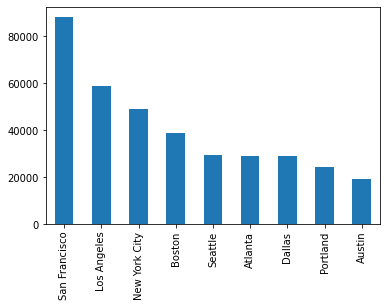

In [107]:
df["State"].value_counts().plot(kind='bar')

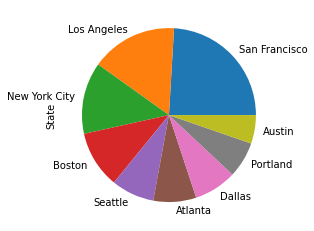

In [108]:
df["State"].value_counts().plot(kind='pie')

**Finding the percentage of sale on holidays and the rest of the week**

In [109]:
# Weekends (Saturday, Sunday) have 39% of the total sales
def percentage(part, whole):
    percentage = 100 * float(part)/float(whole)
    return (round(percentage))
print('weekend :',df["WeekEnd"].value_counts().values[1])#weekend
print('not weekend :',df["WeekEnd"].value_counts().values[0])#  not weekend
sales_percentage_in_weekend=percentage(df["WeekEnd"].value_counts().values[1], df["WeekEnd"].value_counts().values[0])
print('sales_percentage_in_Weekend=', sales_percentage_in_weekend,'%')
print('sales_percentage_in_notWeekend=', 100-sales_percentage_in_weekend,'%')

weekend : 103107
not weekend : 263623
sales_percentage_in_Weekend= 39 %
sales_percentage_in_notWeekend= 61 %


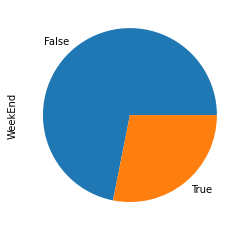

In [110]:
df["WeekEnd"].value_counts().plot(kind="pie")

**Getting the number of products in each month of the years**

In [112]:
plot1 = df.groupby(["month_year"]).size().reset_index()
plot1.rename(columns = {0:'count'}, inplace = True)
plot1.tail(3)

,month_year,count
22,2021-11,22698
23,2021-12,23755
24,2022-01,40


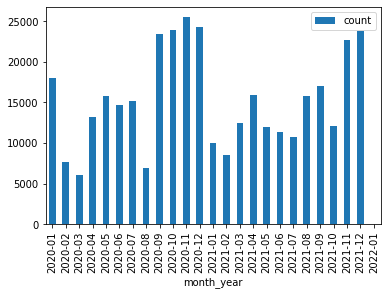

In [113]:
plot1[["month_year","count"]].plot.bar(x='month_year', y='count')

**Get the highest product in month_year**

heighest poruduct sales is:
Product       Lightning Charging Cable
month_year                     2020-12
count                             2870
Name: 12, dtype: object

#########################

minimum poruduct sales is:
Product       LG Washing Machine
month_year               2020-12
count                         71
Name: 11, dtype: object


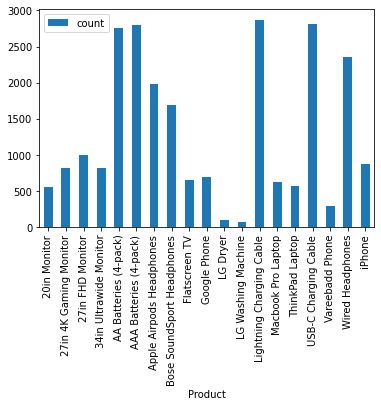

In [114]:
def get_the_highest_product_in_month_year(month_year):
  plot1 = df.groupby(["Product", "month_year"]).size().reset_index()
  plot1.rename(columns = {0:'count'}, inplace = True)
  plot2=plot1[plot1['month_year']==month_year]

  plot3 = plot2.groupby(['Product','month_year']).sum()

  plot3.reset_index(inplace=True)
  print('heighest poruduct sales is:')
  print(plot3[plot3['count']==plot3['count'].max()].iloc[0])
  print('\n#########################\n')
  print('minimum poruduct sales is:')
  print(plot3[plot3['count']==plot3['count'].min()].iloc[0])
  #from matplotlib import pyplot as plt
  plot3[["Product","count"]].plot.bar(x='Product', y='count')

get_the_highest_product_in_month_year('2020-12')
#get_the_highest_product_in_month_year('2021-12')

**Getting the best month for sales and how much was earned that month**

In [115]:
df.groupby(['Month']).sum()['Sales'].reset_index()

,Month,Sales
0,1,5179927.97
1,2,3031761.57
2,3,3496905.73
3,4,5422150.34
4,5,5167873.25
5,6,4759713.55
6,7,4838380.81
7,8,4254596.30
8,9,7538222.19
9,10,6764819.88


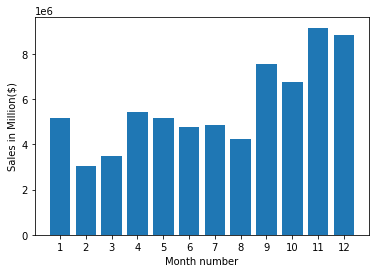

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
months = range(1,13)
#print(months)

plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Million($)')
plt.xlabel('Month number')
plt.show()

**Products sales - hour**

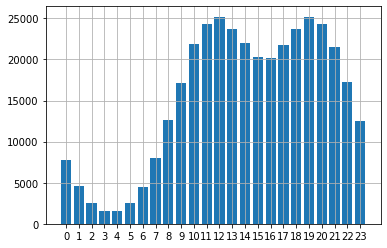

In [121]:
#  maximum of buying the products was highest at 12:00 pm or 7:00 pm

keys = [pair for pair, df in df.groupby(['Hour'])]

plt.bar(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

**finding the products are most often sold together**

In [123]:
plot4 = df[df['Order ID'].duplicated(keep=False)]

plot4['Grouped'] = plot4.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
plot5 = plot4[['Order ID', 'Grouped']].drop_duplicates()

In [127]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in plot5['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

plot6=pd.DataFrame(count.most_common(15),columns=['products','count'])
plot6

,products,count
0,"(iPhone, Lightning Charging Cable)",2818
1,"(USB-C Charging Cable, Lightning Charging Cable)",2565
2,"(USB-C Charging Cable, USB-C Charging Cable)",2564
3,"(USB-C Charging Cable, AAA Batteries (4-pack))",2508
4,"(Google Phone, USB-C Charging Cable)",2498
5,"(Lightning Charging Cable, USB-C Charging Cable)",2488
6,"(AAA Batteries (4-pack), USB-C Charging Cable)",2479
7,"(AA Batteries (4-pack), USB-C Charging Cable)",2430
8,"(USB-C Charging Cable, AA Batteries (4-pack))",2410
9,"(AAA Batteries (4-pack), Lightning Charging Ca...",2407


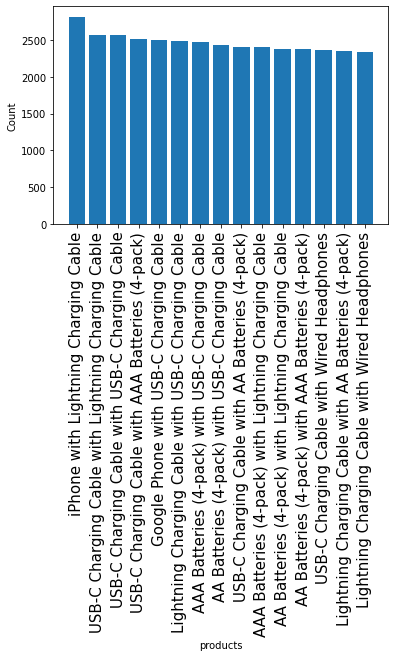

In [158]:
keys=plot6['products'].apply(lambda x: ' with '.join(x))
keys=keys.to_numpy()

plt.bar(keys,plot6['count'].to_numpy())
plt.ylabel('Count')
plt.xlabel('products')
plt.xticks(keys, rotation='vertical', size=15)
plt.show()

**Getting product sold the most**

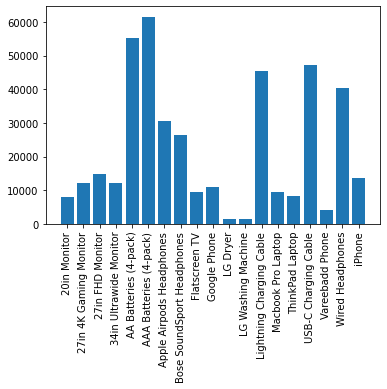

In [ ]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

# **4- Save dataset after preprocessing**

In [ ]:
df.to_excel('/content/drive/MyDrive/umnieh task/sales data after combine files and pre-processing.xlsx')
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_year,State,Day,Year,Month,WeekEnd,Sales,Hour,Minute,Date,Count
0,141234,27in FHD Monitor,1,149.99,2021-01-17 18:16:00,"111 Church St, Portland, OR 97035",2021-01,Portland,Sunday,2021,1,True,149.99,18,16,2021-01-17,1
